In [106]:
import numpy as np
import pandas as pd

df_setosa = pd.read_csv('setosa.csv', header=None, sep=',')
df_virginica = pd.read_csv('virginica.csv', header=None, sep=',')

#Form data points as array
X_setosa = df_setosa.loc[:, :].values
X_virginica = df_virginica.loc[:, :].values

print(X_setosa.shape)
print(X_virginica.shape)

(50, 2)
(50, 2)


In [150]:
def get_mean(X):
    return np.mean(X[:,:], axis=0)  

### Step 1: compute Mean Vectors

In [151]:

mean_vectors = []
mean_vectors.append(get_mean(X_setosa))
mean_vectors.append(get_mean(X_virginica))

for cl in range(0, 2):
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl]))


Mean Vector class 0: [5.006 3.428]

Mean Vector class 1: [6.588 2.974]



### Step 2: compute scatter matrices

In [152]:
def get_withing_scatter_matrix(X, mean_vector):
    class_sc_mat = np.zeros((2,2))                  # Scatter matrix for every class
    for index in range(len(X)):                    
        row, mv = X[index,:].reshape(2,1), mean_vector.reshape(2,1) # Make column vectors
        class_sc_mat = class_sc_mat + ((row - mv).dot((row-mv).T))
    return class_sc_mat;

In [153]:
S_W = np.zeros((2,2))
S_W = S_W + get_withing_scatter_matrix(X_setosa, mean_vectors[0]) # Scatter matrix for class setosa
S_W = S_W + get_withing_scatter_matrix(X_virginica, mean_vectors[1]) # Scatter matrix for virginica class

print("within-class Scatter Matrix:\n", S_W)                         # Sum class scatter matrices

within-class Scatter Matrix:
 [[25.901  9.456]
 [ 9.456 12.137]]


In [176]:
def get_between_scatter_matrix():
    S_B = np.zeros((2,2))                             # Between Class scatter
    setosa_virginica_data = np.concatenate((X_setosa, X_virginica), axis =0)  # Concatenate along y axis
    overall_mean = np.mean(setosa_virginica_data, axis = 0)
    
    for i, mean_vec in enumerate(mean_vectors):
        n = 0                                         # Number of sample per class
        if i == 0:
            n = len(X_setosa)
        elif i == 1:
            n = len(X_virginica)
            
        mean_vec = mean_vec.reshape(2,1)              # Make column vector
        overall_mean = overall_mean.reshape(2,1)      # Make column vector
        
        S_B = S_B + (n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T))
        
    return S_B;   

In [179]:
S_B = np.zeros((2,2))       # Between Class scatter # It is dupplicate, bcs to be accessible every where
S_B = get_between_scatter_matrix()

print("between-class Scatter Matrix:\n", S_B)  

between-class Scatter Matrix:
 [[ 62.5681 -17.9557]
 [-17.9557   5.1529]]


### Step 3: Find eingenvalue and eigencector

In [183]:
A = np.linalg.inv(S_W).dot(S_B)
print(A)

[[ 4.13069946 -1.18542197]
 [-4.6976678   1.3481297 ]]


In [186]:
eig_vals, eig_vecs = np.linalg.eig(A)

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(2,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.66033521]
 [-0.75097098]]
Eigenvalue 1: 5.48e+00

Eigenvector 2: 
[[0.2758444]
 [0.9612023]]
Eigenvalue 2: 0.00e+00


### Step 4: Selecting linear discriminants for the new feature subspace

In [187]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

5.478829157953044
0.0


In [199]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%


In [201]:
# 1 vector can separate the entire two classes, no need for vector 2
W = eig_pairs[0][1].reshape(2,1) 
print('Matrix W:\n', W.real)


Matrix W:
 [[ 0.66033521]
 [-0.75097098]]


### Step 5: Transforming the samples onto the new subspace

In [213]:
setosa_lda = X_setosa.dot(W)       # Setosa points on the new subspace
virginica_lda = X_virginica.dot(W) # Virginica points on the new subspace


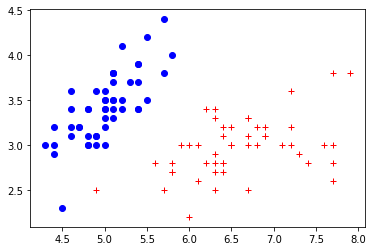

In [226]:
# Orignial plotting
from matplotlib import pyplot as plt
plt.plot(X_setosa[:, 0], X_setosa[:, 1], 'bo')

plt.plot(X_virginica[:, 0], X_virginica[:, 1] , 'r+')

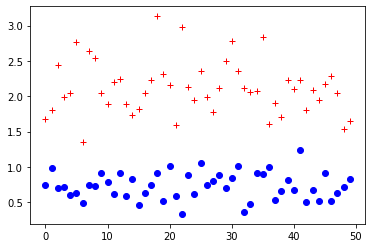

In [227]:
# new LDA in 1-d
from matplotlib import pyplot as plt

ax = plt.subplot(111)

plt.plot(setosa_lda, 'bo')

plt.plot(virginica_lda, 'r+')


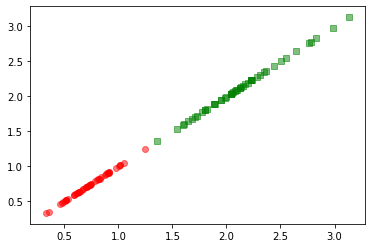

In [229]:
# new LDA in 1-d
from matplotlib import pyplot as plt
plt.scatter(x=setosa_lda[:,0],
            y=setosa_lda[:,0],
            marker= 'o',
            color='red',
            alpha=0.5,
            label= 'Setosa')

plt.scatter(x=virginica_lda[:,0],
            y=virginica_lda[:,0],
            marker= 's',
            color='green',
            alpha=0.5,
            label= 'Setosa')